In [123]:
import numpy as np
import pandas as pd
import xarray as xr

In [124]:
data = xr.DataArray(np.random.rand(2, 3), dims=['x', 'y'], coords={ 'x': [10, 20] })
data

<xarray.DataArray (x: 2, y: 3)>
array([[0.91625862, 0.92062965, 0.5946534 ],
       [0.73291962, 0.29460473, 0.26835515]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [125]:
xr.DataArray(pd.Series(range(3), index=list("abc"), name='foo'))

<xarray.DataArray 'foo' (dim_0: 3)>
array([0, 1, 2])
Coordinates:
  * dim_0    (dim_0) object 'a' 'b' 'c'

In [126]:
data.coords

Coordinates:
  * x        (x) int64 10 20

In [127]:
xr.DataArray(pd.Series(range(3), index=list("abc"), name="foo"))

<xarray.DataArray 'foo' (dim_0: 3)>
array([0, 1, 2])
Coordinates:
  * dim_0    (dim_0) object 'a' 'b' 'c'

## Indexing

Xarray provides 4 ways of indexing:
- Label based indexing along the provided dimension
- Slice indexing
- `loc[...]/iloc[...]` indexing
- `sel(<dim_name>=...)/isel(<dim_name>=...)`

Note that, if we have a dimension called `x`, the difference between `sel` and `isel` is the following:
- `sel` is meant to be used specifying a coordinate name, for example if we have 2 coordinate for the `x` dimension, `(10,20)`, using `sel` we must specify `10` or `20`, the coorindates name &rarr; `da.sel(x=10)`.
- `isel` does not consider coordinates labels, but the integer based index of the "array" of coordinates, so if we want to replicate the same example as above, we should have written `ds.isel(x=0)`.

In [128]:
data.loc[10] # indexing by coordinates name

<xarray.DataArray (y: 3)>
array([0.91625862, 0.92062965, 0.5946534 ])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [129]:
data.isel(y=0) # integere select: by dimension name and INTEGERER

<xarray.DataArray (x: 2)>
array([0.91625862, 0.73291962])
Coordinates:
  * x        (x) int64 10 20

In [130]:
data.sel(x=10) # Select, by dimension name and LABEL

<xarray.DataArray (y: 3)>
array([0.91625862, 0.92062965, 0.5946534 ])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [131]:
attrs = {
    "long_name": "random_velocity",
    "untis": "metres/sec",
    "description": "A random variaible",
    "random_attr": 123
}

data.attrs = attrs
data

<xarray.DataArray (x: 2, y: 3)>
array([[0.91625862, 0.92062965, 0.5946534 ],
       [0.73291962, 0.29460473, 0.26835515]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:    random_velocity
    untis:        metres/sec
    description:  A random variaible
    random_attr:  123

## Computation

In [132]:
data + 10

<xarray.DataArray (x: 2, y: 3)>
array([[10.91625862, 10.92062965, 10.5946534 ],
       [10.73291962, 10.29460473, 10.26835515]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [133]:
np.sin(data)

<xarray.DataArray (x: 2, y: 3)>
array([[0.79332946, 0.79598292, 0.56022168],
       [0.66904242, 0.29036163, 0.26514581]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:    random_velocity
    untis:        metres/sec
    description:  A random variaible
    random_attr:  123

In [134]:
data.sum()

<xarray.DataArray ()>
array(3.72742116)

In [135]:
a = xr.DataArray(np.random.randn(3), [data.coords["y"]])
a

<xarray.DataArray (y: 3)>
array([-1.48315373,  1.83141785,  0.65653424])
Coordinates:
  * y        (y) int64 0 1 2

In [136]:

b = xr.DataArray(np.random.randn(4), dims="z")
b

<xarray.DataArray (z: 4)>
array([-1.27968659, -0.62528824, -0.47264768, -1.26170015])
Dimensions without coordinates: z

In [137]:
c = a + b
c

<xarray.DataArray (y: 3, z: 4)>
array([[-2.76284033, -2.10844197, -1.95580141, -2.74485388],
       [ 0.55173126,  1.20612961,  1.35877018,  0.56971771],
       [-0.62315235,  0.031246  ,  0.18388656, -0.6051659 ]])
Coordinates:
  * y        (y) int64 0 1 2
Dimensions without coordinates: z

In [138]:
np.random.randn(3)[:, np.newaxis] + np.random.randn(2)[np.newaxis, :]

array([[0.82771591, 0.82209982],
       [0.68212439, 0.6765083 ],
       [0.67461914, 0.66900305]])

## Group By

In [139]:
labels = xr.DataArray(["E", "F", "E"], dims="y", name="labels")
data.groupby(labels).mean("y")

<xarray.DataArray (x: 2, labels: 2)>
array([[0.75545601, 0.92062965],
       [0.50063738, 0.29460473]])
Coordinates:
  * x        (x) int64 10 20
  * labels   (labels) object 'E' 'F'
Attributes:
    long_name:    random_velocity
    untis:        metres/sec
    description:  A random variaible
    random_attr:  123

In [140]:
data.groupby(labels).map(lambda x: x - x.min())

<xarray.DataArray (x: 2, y: 3)>
array([[0.64790348, 0.62602492, 0.32629825],
       [0.46456447, 0.        , 0.        ]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

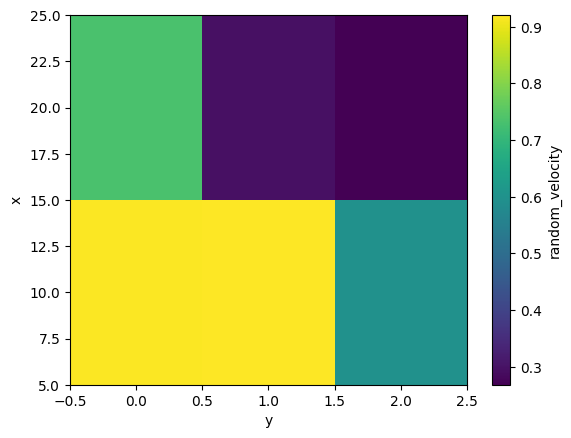

In [141]:
data.plot()

In [142]:
data.groupby(labels).sum().to_series()

x   labels
10  E         1.510912
    F         0.920630
20  E         1.001275
    F         0.294605
dtype: float64

# Datasets

In [143]:
ds = xr.Dataset({
    "foo": data,
    "bar": ("x", [1, 2]), # sharing x coord with above data
    "baz": np.pi,
})
ds

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 0.9163 0.9206 0.5947 0.7329 0.2946 0.2684
    bar      (x) int64 1 2
    baz      float64 3.142

In [144]:
ds['bar'].sel(x=20)

<xarray.DataArray 'bar' ()>
array(2)
Coordinates:
    x        int64 20

## DataArray

In [145]:
# creating a data array in it's complete form
data = np.random.randn(4, 3)

locs = ["IA", "IL", "IN"]
times = pd.date_range("2000-01-01", periods=4)

# only data is required, all of the other argumenst, if not provided, will be 
# filled with default values
arr = xr.DataArray(data, coords=[times, locs], dims=["time", "space"], name="foo")

# akshually, only dimensions have default values, coordinates does not.
# != from pandas that always auto index data
arr

<xarray.DataArray 'foo' (time: 4, space: 3)>
array([[-0.25128743,  0.10361843,  0.29380985],
       [-0.86416936,  1.10965788,  0.47591045],
       [-0.28215247, -2.20643831,  0.17053528],
       [ 0.61241485,  0.12372894,  0.06592992]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

Coordinates can be specified in the following ways:
- A **list of values** with lenght wqual to the number fo dimnesion, providing coordinate labels for each dimension. Each value must be of one of the following:
  - A `DataArray` or `Variabile` class members
  - A tuple of the form `(dims, data[, attrs])` wich is converted into arguments for `Variable`
  - A *pandas* object or scalar value.
  - A 1D array or list, which is interpreted as values for a one dimensional cooridnate variable along the same dimension as it's name.
- A **dictionary** of `{coord_name: coord}` where values are of the same form as the list. Supplying coordinates as a dict allows other coordinates than those corresponding to dimensions. If you supply `coords` as a dict, you MUST provide `dims`.

In [146]:
xr.DataArray(data, coords=[("time", times), ("space", locs)])

<xarray.DataArray (time: 4, space: 3)>
array([[-0.25128743,  0.10361843,  0.29380985],
       [-0.86416936,  1.10965788,  0.47591045],
       [-0.28215247, -2.20643831,  0.17053528],
       [ 0.61241485,  0.12372894,  0.06592992]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [147]:
xr.DataArray(
    data,
    coords={
    "time": times,
    "space": locs,
    "const": 42,
    "ranking": ("space", [1, 2, 3]),
    },
    dims=["time", "space"]
)

<xarray.DataArray (time: 4, space: 3)>
array([[-0.25128743,  0.10361843,  0.29380985],
       [-0.86416936,  1.10965788,  0.47591045],
       [-0.28215247, -2.20643831,  0.17053528],
       [ 0.61241485,  0.12372894,  0.06592992]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    const    int64 42
    ranking  (space) int64 1 2 3

In [148]:
# Dictionary with coords across multiple dimensions
xr.DataArray(
    data,
    coords={
        "time":times,
        "space": locs,
        "const": 42,
        "rankin": (("time", "space"), np.arange(12).reshape(4, 3)),
    },
    dims=["time", "space"]
)

<xarray.DataArray (time: 4, space: 3)>
array([[-0.25128743,  0.10361843,  0.29380985],
       [-0.86416936,  1.10965788,  0.47591045],
       [-0.28215247, -2.20643831,  0.17053528],
       [ 0.61241485,  0.12372894,  0.06592992]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    const    int64 42
    rankin   (time, space) int64 0 1 2 3 4 5 6 7 8 9 10 11

In [149]:
# Constructor by pandas Data Structure
df = pd.DataFrame({ "x": [0, 1], "y": [2, 3]}, index=["a", "b"])
df.index.name = "abc"
df.columns.name = "xyz"
df

xyz,x,y
abc,,
a,0,2
b,1,3


In [150]:
xr.DataArray(df)

<xarray.DataArray (abc: 2, xyz: 2)>
array([[0, 2],
       [1, 3]])
Coordinates:
  * abc      (abc) object 'a' 'b'
  * xyz      (xyz) object 'x' 'y'

In [151]:
ds

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 0.9163 0.9206 0.5947 0.7329 0.2946 0.2684
    bar      (x) int64 1 2
    baz      float64 3.142

In [152]:
arr.values = 1.0 * arr.values

## DataSet

In addition to the dict-like interface of the dataset itself (which can be used to access any valiable in a dataset)
datasets have four key properties:
- `dims`: dictionary mapping from dim names to the fixed legth of dimensions.
- `data_vars`: dict-like container of DataArrays corresponding to variabels.
- `coords`: container of DAtaArrays intended to label points used in `data_vars`
- `attrs`: this holds aribitrary metadata.

In [153]:
temp = 15 + 8 * np.random.randn(2, 2, 3)
precip = 10 * np.random.randn(2, 2, 3)

lon = [[-99.83, -99.32], [-99.79, 99.23]]
lat = [[42.25, 42.21], [42.63, 42.59]]

In [154]:
ds = xr.Dataset(
    {
        # Data Variables as (coords, data)
        "temperature": (["x", "y", "time"], temp),
        "precipitation": (["x", "y", "time"], precip),
    },
    coords={
        "lon": (["x", "y"], lon),
        "lat": (["x", "y"], lat),
        "time": pd.date_range("2014-09-06", periods=3),
        "reference_time": pd.Timestamp("2014-09-05"),
    }
)

ds

<xarray.Dataset>
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 14.03 27.62 23.01 ... 19.97 6.677 19.52
    precipitation   (x, y, time) float64 -3.69 3.328 -13.29 ... 6.42 7.266 15.06

In [155]:
ds["temperature"] # extrating temperature DataArray

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[14.03140119, 27.61558632, 23.01222968],
        [18.87771471, 13.28259306, -3.06096466]],

       [[13.865388  , 16.11656638, 21.51125948],
        [19.97232725,  6.67688214, 19.51863944]]])
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y

In [156]:
print(ds.coords)
print("------------------------------------------------")
print(ds.data_vars)

Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
------------------------------------------------
Data variables:
    temperature    (x, y, time) float64 14.03 27.62 23.01 ... 19.97 6.677 19.52
    precipitation  (x, y, time) float64 -3.69 3.328 -13.29 ... 6.42 7.266 15.06


In [157]:
ds.drop_vars("temperature")

<xarray.Dataset>
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    precipitation   (x, y, time) float64 -3.69 3.328 -13.29 ... 6.42 7.266 15.06

Dropping a dimension will drop each variable that is using that dimension!

In [158]:
ds.drop_dims('time')

<xarray.Dataset>
Dimensions:         (x: 2, y: 2)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    *empty*

It's possible to create pipelines of transofrmations with the `pipe(func)` method

In [159]:
import matplotlib.pyplot as plt

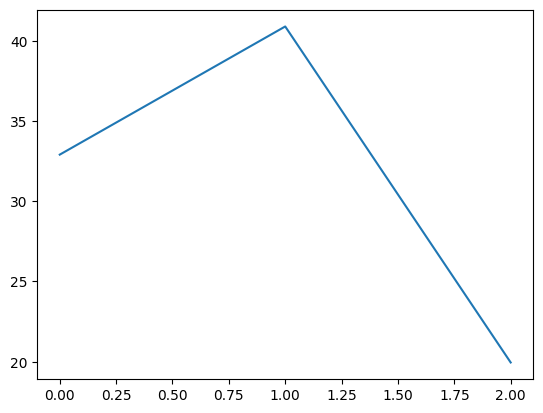

In [160]:
(ds.temperature.sel(x=0).pipe(lambda x: x * 2).mean("y").pipe(plt.plot))

## Coordindates

Coordinates can be divided into two set:
- **Dimension Coordinates**: one dimensional coordinates with a name equal to their one and only one associated dimension (marked with `*`)
  - Used for label based indexing and alingnement (like pandas `Index` object).
- **Non-Dimension Coordinate**: variables that contains coordinate data, but are not a dimension coordinate:
  - They can be multidimensional.
  - No reletionship betwee the name of the non dimension coordinate name(s) and the dimension(s).
  - They can be useful for indexing and plotting.
  - Xarray does not make direct use of them (during alignement or automatic indexing).

In [161]:
ds.coords

Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05

Converting back and forth between data and coordinates

In [162]:
ds.reset_coords() # make each non dimension coordinate a data variable

<xarray.Dataset>
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 14.03 27.62 23.01 ... 19.97 6.677 19.52
    precipitation   (x, y, time) float64 -3.69 3.328 -13.29 ... 6.42 7.266 15.06
    lon             (x, y) float64 -99.83 -99.32 -99.79 99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    reference_time  datetime64[ns] 2014-09-05

In [163]:
ds.set_coords(["temperature", "precipitation"])

<xarray.Dataset>
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    temperature     (x, y, time) float64 14.03 27.62 23.01 ... 19.97 6.677 19.52
    precipitation   (x, y, time) float64 -3.69 3.328 -13.29 ... 6.42 7.266 15.06
    lon             (x, y) float64 -99.83 -99.32 -99.79 99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    *empty*

In [164]:
ds['temperature'].reset_coords(drop=True)

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[14.03140119, 27.61558632, 23.01222968],
        [18.87771471, 13.28259306, -3.06096466]],

       [[13.865388  , 16.11656638, 21.51125948],
        [19.97232725,  6.67688214, 19.51863944]]])
Coordinates:
  * time     (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
Dimensions without coordinates: x, y

In [165]:
ds

<xarray.Dataset>
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 14.03 27.62 23.01 ... 19.97 6.677 19.52
    precipitation   (x, y, time) float64 -3.69 3.328 -13.29 ... 6.42 7.266 15.06

Some useful coordinates method

In [166]:
ds.coords.to_dataset()

<xarray.Dataset>
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    *empty*

In [167]:
alt = xr.Dataset(coords={"z": [10], "lat": 0, "lon": 0})
ds.coords.merge(alt.coords).coords

Coordinates:
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
  * z               (z) int64 10

In [168]:
ds['time'].to_index() # To pandas Index

DatetimeIndex(['2014-09-06', '2014-09-07', '2014-09-08'], dtype='datetime64[ns]', name='time', freq='D')

In [169]:
ds.indexes # dict-like object storing key=dim_name and value=Index

Indexes:
    time     DatetimeIndex(['2014-09-06', '2014-09-07', '2014-09-08'], dtype='datetime64[ns]', name='time', freq='D')

### Working with multiindex coordinates

In [170]:
midx = pd.MultiIndex.from_arrays(
    [["R", "R", "V", "V"], [0.1, 0.2, 0.7, 0.9]], names=("band", "wn")
)

mda = xr.DataArray(np.random.rand(4), coords={"spec": midx}, dims="spec")
mda

<xarray.DataArray (spec: 4)>
array([0.52286283, 0.76912144, 0.5526985 , 0.95394188])
Coordinates:
  * spec     (spec) object MultiIndex
  * band     (spec) object 'R' 'R' 'V' 'V'
  * wn       (spec) float64 0.1 0.2 0.7 0.9

In [171]:
print(mda.band)
print("------------------------------------------------------------------------------------------")
print(mda.wn)

<xarray.DataArray 'band' (spec: 4)>
array(['R', 'R', 'V', 'V'], dtype=object)
Coordinates:
  * spec     (spec) object MultiIndex
  * band     (spec) object 'R' 'R' 'V' 'V'
  * wn       (spec) float64 0.1 0.2 0.7 0.9
------------------------------------------------------------------------------------------
<xarray.DataArray 'wn' (spec: 4)>
array([0.1, 0.2, 0.7, 0.9])
Coordinates:
  * spec     (spec) object MultiIndex
  * band     (spec) object 'R' 'R' 'V' 'V'
  * wn       (spec) float64 0.1 0.2 0.7 0.9


In [172]:
mda.to_pandas() # as a pandas Series

band  wn 
R     0.1    0.522863
      0.2    0.769121
V     0.7    0.552698
      0.9    0.953942
dtype: float64

**Indexing**: every selector allowed in pandas, is allowed in Xarray,
therefore, you can slice a multi index by provind multiple *indexers*
i.e. a tuple of slices, labels, list of labels, ...

In [173]:
# creating and index from the cartesian product of "abc" X [0, 1] => a,0 ; a,1 ; b,0 ; b1 ; ...
midx = pd.MultiIndex.from_product([list("abc"), [0, 1]], names=("one", "two"))
mda = xr.DataArray(np.random.rand(6, 3), [("x", midx), ("y", range(3))])
mda

<xarray.DataArray (x: 6, y: 3)>
array([[0.62625993, 0.53673693, 0.77753181],
       [0.59665851, 0.38862991, 0.84856184],
       [0.12584781, 0.16668342, 0.01359   ],
       [0.1309566 , 0.5815132 , 0.83722796],
       [0.57801222, 0.26332637, 0.09190129],
       [0.32624928, 0.39778022, 0.36324968]])
Coordinates:
  * x        (x) object MultiIndex
  * one      (x) object 'a' 'a' 'b' 'b' 'c' 'c'
  * two      (x) int64 0 1 0 1 0 1
  * y        (y) int64 0 1 2

In [174]:
"""
Selecting values of each coordinate along "x" dimension
that match the filter: coord == ("a" || "b") && 0
"""
mda.sel(x=(list("ab"), [0]))

<xarray.DataArray (x: 2, y: 3)>
array([[0.62625993, 0.53673693, 0.77753181],
       [0.12584781, 0.16668342, 0.01359   ]])
Coordinates:
  * x        (x) object MultiIndex
  * one      (x) object 'a' 'b'
  * two      (x) int64 0 0
  * y        (y) int64 0 1 2

In [175]:
# Xarray adds indexing through dictionaries
mda.sel(x={"one": "a", "two": 0})

<xarray.DataArray (y: 3)>
array([0.62625993, 0.53673693, 0.77753181])
Coordinates:
    x        object ('a', 0)
    one      <U1 'a'
    two      int64 0
  * y        (y) int64 0 1 2

In [176]:
# selecting elements with a list/tuples of labels, or a slice of tuples
mda.sel(x=[("a", 0), ("b", 1)])

<xarray.DataArray (x: 2, y: 3)>
array([[0.62625993, 0.53673693, 0.77753181],
       [0.1309566 , 0.5815132 , 0.83722796]])
Coordinates:
  * x        (x) object MultiIndex
  * one      (x) object 'a' 'b'
  * two      (x) int64 0 1
  * y        (y) int64 0 1 2

In [177]:
# at last, `sel` accept multi index levels directly as a keyword argument
mda.sel(one="a", two=0)

<xarray.DataArray (y: 3)>
array([0.62625993, 0.53673693, 0.77753181])
Coordinates:
    x        object ('a', 0)
    one      <U1 'a'
    two      int64 0
  * y        (y) int64 0 1 2

In [178]:
# same as
mda.loc[{"one": "a", "two": 0}]
#or
mda.loc[("a", 0), ...]

<xarray.DataArray (y: 3)>
array([0.62625993, 0.53673693, 0.77753181])
Coordinates:
    x        object ('a', 0)
    one      <U1 'a'
    two      int64 0
  * y        (y) int64 0 1 2

Note: the ellipsis operator in the `loc` specifier is mandatory because
unlike pandas, xarray does not guess whether you provide index levels or 
dimensions  when using loc in some ambiguous cases.

## Indexing in Depth

Xarray's indexing strategies can be summerized in this table:

| Dimension Lookup | Index Lookup | `DataArray` syntax | `Dataset` syntax |
|------------------|--------------|--------------------|------------------|
| Positional       | By integer   | `da[:, 0]`         | *not available*  |
| Positional       | By  label    | `da.loc[:, 'IA]`   | *not available*  |
| By name          | By integer   | `da.isel(space=0)` or `da[dict(space=0)]`         | `ds.isel(space=0)` or `ds[dict(space=0)]`  |
| By name          | By  label    | `da.sel(space='IA')` or `da.loc[dict(space='IA')]`         | `ds.sel(space='IA')` or `ds.loc[dict(space='IA')]`  |

It's also possible to index by supplying `DataArray` object as indexer

### Positional Indexing

Mostly just like numpy arrays and pandas `loc` indexing

In [179]:
da = xr.DataArray(
    np.random.rand(4, 3),
    {
        "time": pd.date_range("2023-04-12", periods=4),
        "space": ["IA", "IL", "IN"],
    }
)

da[: 2]

<xarray.DataArray (time: 2, space: 3)>
array([[0.28556761, 0.55920233, 0.38951731],
       [0.73922327, 0.56261354, 0.84688337]])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13
  * space    (space) <U2 'IA' 'IL' 'IN'

In [180]:
da[0, 0]

<xarray.DataArray ()>
array(0.28556761)
Coordinates:
    time     datetime64[ns] 2023-04-12
    space    <U2 'IA'

In [181]:
da[:, [1, 2]] # selecting all rows ("time" dim), and 2nd and 3rd col ("IL", "IN")

<xarray.DataArray (time: 4, space: 2)>
array([[0.55920233, 0.38951731],
       [0.56261354, 0.84688337],
       [0.58298196, 0.84745147],
       [0.77168356, 0.77858962]])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14 2023-04-15
  * space    (space) <U2 'IL' 'IN'

In [182]:
da.loc["2023-04-12": "2023-04-14", "IA"]

<xarray.DataArray (time: 3)>
array([0.28556761, 0.73922327, 0.01347304])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14
    space    <U2 'IA'

Just like pandas, you can set values using this notation

In [183]:
da.loc["2023-04-12", ["IL", "IN"]] = -10
da

<xarray.DataArray (time: 4, space: 3)>
array([[  0.28556761, -10.        , -10.        ],
       [  0.73922327,   0.56261354,   0.84688337],
       [  0.01347304,   0.58298196,   0.84745147],
       [  0.21432421,   0.77168356,   0.77858962]])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14 2023-04-15
  * space    (space) <U2 'IA' 'IL' 'IN'

### Indexing with Dimension name

Two ways to do this:
1. `sel()` and `isel()`

In [184]:
da.isel(space=0, time=slice(None, 2)) #  same as: `da[0:2, 0]`

<xarray.DataArray (time: 2)>
array([0.28556761, 0.73922327])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13
    space    <U2 'IA'

In [185]:
da.sel(time=slice("2023-04-12", "2023-04-14"))

<xarray.DataArray (time: 3, space: 3)>
array([[  0.28556761, -10.        , -10.        ],
       [  0.73922327,   0.56261354,   0.84688337],
       [  0.01347304,   0.58298196,   0.84745147]])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14
  * space    (space) <U2 'IA' 'IL' 'IN'

2. Use a dictionary as the argument for *array positional* or *label based* array indexing

In [186]:
da[{"space": 0, "time": slice(None, 2)}] # or da[dict(space=0, time=slice(None, 2))]

<xarray.DataArray (time: 2)>
array([0.28556761, 0.73922327])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13
    space    <U2 'IA'

In [187]:
# index by dimension coordinate labels
da.loc[dict(time=slice("2023-04-12", "2023-04-14"))]

<xarray.DataArray (time: 3, space: 3)>
array([[  0.28556761, -10.        , -10.        ],
       [  0.73922327,   0.56261354,   0.84688337],
       [  0.01347304,   0.58298196,   0.84745147]])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14
  * space    (space) <U2 'IA' 'IL' 'IN'

### Dataset Indexing

In [188]:
ds = da.to_dataset(name="foo")

ds

<xarray.Dataset>
Dimensions:  (time: 4, space: 3)
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14 2023-04-15
  * space    (space) <U2 'IA' 'IL' 'IN'
Data variables:
    foo      (time, space) float64 0.2856 -10.0 -10.0 ... 0.2143 0.7717 0.7786

In [189]:
ds.isel(space=0, time=0)

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    time     datetime64[ns] 2023-04-12
    space    <U2 'IA'
Data variables:
    foo      float64 0.2856

In [190]:
ds.sel(time="2023-04-12")

<xarray.Dataset>
Dimensions:  (space: 3)
Coordinates:
    time     datetime64[ns] 2023-04-12
  * space    (space) <U2 'IA' 'IL' 'IN'
Data variables:
    foo      (space) float64 0.2856 -10.0 -10.0

In [191]:
# ds[0, 0] KeyErro!
# positional indexing is somehow ambiguous in Xarray.
# You can make it work with dimension names
ds[{"space": [0], "time": [0]}]

<xarray.Dataset>
Dimensions:  (time: 1, space: 1)
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12
  * space    (space) <U2 'IA'
Data variables:
    foo      (time, space) float64 0.2856

In [192]:
# same thing applies to loc
ds.loc[dict(space=["IA", "IN"])]

<xarray.Dataset>
Dimensions:  (time: 4, space: 2)
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14 2023-04-15
  * space    (space) <U2 'IA' 'IN'
Data variables:
    foo      (time, space) float64 0.2856 -10.0 0.7392 ... 0.8475 0.2143 0.7786

### `where` masking

The selection operation returns an object with the same shape but with the elements maked by the predicate inside `where` with `nan`

In [193]:
da = xr.DataArray(np.arange(16).reshape(4, 4), dims=["x", "y"])
da.where(da.x + da.y < 4)

<xarray.DataArray (x: 4, y: 4)>
array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6., nan],
       [ 8.,  9., nan, nan],
       [12., nan, nan, nan]])
Dimensions without coordinates: x, y

In [194]:
# if you don't want the data to be the same size of the oringinal one
da.where(da.y < 2, drop=True)

<xarray.DataArray (x: 4, y: 2)>
array([[ 0.,  1.],
       [ 4.,  5.],
       [ 8.,  9.],
       [12., 13.]])
Dimensions without coordinates: x, y

It's possible to select elements with the `isnin()` method, that works particurarly well with the `where` method.

Side Note: this can be sometimes significantly slower than `sel`

In [195]:
da = xr.DataArray([1, 2, 3, 4, 5], dims=["x"])
lookup = da * -1

da.where(lookup.isin([-2, -4]), drop=True)

<xarray.DataArray (x: 2)>
array([2., 4.])
Dimensions without coordinates: x

## Vectorized Indexing

In other terms, indexing many array elements at once in a *vectorized manner*

In [196]:
da = xr.DataArray(
    np.arange(12).reshape((3, 4)),
    dims=["x", "y"],
    coords={"x": [0, 1, 2], "y": ["a", "b", "c", "d"]},
)

da

<xarray.DataArray (x: 3, y: 4)>
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])
Coordinates:
  * x        (x) int64 0 1 2
  * y        (y) <U1 'a' 'b' 'c' 'd'

In [197]:
da[[0, 2, 2], [1, 3]]

<xarray.DataArray (x: 3, y: 2)>
array([[ 1,  3],
       [ 9, 11],
       [ 9, 11]])
Coordinates:
  * x        (x) int64 0 2 2
  * y        (y) <U1 'b' 'd'

For more flexibility, you can provide a `DataArray` for vectorized indexing

In [198]:
idx_x = xr.DataArray([0, 1], dims=["x"])
idx_y = xr.DataArray([0, 1], dims=["y"])

da[idx_x, idx_y] # orthogonal indexing

<xarray.DataArray (x: 2, y: 2)>
array([[0, 1],
       [4, 5]])
Coordinates:
  * x        (x) int64 0 1
  * y        (y) <U1 'a' 'b'

In [199]:
da[idx_x, idx_x] # vectorized indexing

<xarray.DataArray (x: 2)>
array([0, 5])
Coordinates:
  * x        (x) int64 0 1
    y        (x) <U1 'a' 'b'

In [200]:
# mutlidimensional indexes
idx = xr.DataArray([[0, 1], [1, 0]], dims=["a", "b"])
da[idx]

<xarray.DataArray (a: 2, b: 2, y: 4)>
array([[[0, 1, 2, 3],
        [4, 5, 6, 7]],

       [[4, 5, 6, 7],
        [0, 1, 2, 3]]])
Coordinates:
    x        (a, b) int64 0 1 1 0
  * y        (y) <U1 'a' 'b' 'c' 'd'
Dimensions without coordinates: a, b

In [201]:
da[:, idx] # same as `da.sel(y=idx)`

<xarray.DataArray (x: 3, a: 2, b: 2)>
array([[[0, 1],
        [1, 0]],

       [[4, 5],
        [5, 4]],

       [[8, 9],
        [9, 8]]])
Coordinates:
  * x        (x) int64 0 1 2
    y        (a, b) <U1 'a' 'b' 'b' 'a'
Dimensions without coordinates: a, b

In [202]:
ds = da.to_dataset(name="baz")
# ds.isel(x=xr.DataArray([0, 1, 2], dims=["points"]))
ds


<xarray.Dataset>
Dimensions:  (x: 3, y: 4)
Coordinates:
  * x        (x) int64 0 1 2
  * y        (y) <U1 'a' 'b' 'c' 'd'
Data variables:
    baz      (x, y) int64 0 1 2 3 4 5 6 7 8 9 10 11

### Assigning values with indexing

In [203]:
ds = xr.tutorial.open_dataset("air_temperature")

In [204]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [205]:
ds["empty"] = xr.full_like(ds["air"].mean("time"), fill_value=0)
# modify one grid point using `loc``
ds['empty'].loc[dict(lon=260, lat=30)] = 100

# modify a 2D region using `loc`
lc = ds.coords['lon'] ; la = ds.coords['lat']

ds['empty'].loc[
    dict(
    lon=lc[(lc > 220) & (lc < 260)],
    lat=la[(la > 20) & (la < 60)])
    ] = 100

We can also use `where`

In [206]:
# one grid point
ds["empty"] = xr.where(
    (ds.coords["lat"] == 20) & (ds.coords['lon'] == 260), 100, ds['empty']
)

# modify a 2D region

mask = (
    (ds.coords["lat"] < 20)
    & (ds.coords['lat'] < 60)
    & (ds.coords['lon'] < 220)
    & (ds.coords['lon'] < 260)
)

ds['empty'] = xr.where(mask, 100, ds['empty'])

A more advanced indexing can be possiible as follows

In [207]:
da = xr.DataArray(np.arange(56).reshape((7, 8)), dims=["x", "y"])
da

<xarray.DataArray (x: 7, y: 8)>
array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55]])
Dimensions without coordinates: x, y

In [208]:
# selecting (ix, iy) = ((0, 0), (1, 1), (6, 0))
# and mapping the values along a new dimension
# without coordinates named "z".
da.isel(
    x=xr.DataArray([0, 1, 6], dims="z"),
    y=xr.DataArray([0, 1, 0], dims="z"))

<xarray.DataArray (z: 3)>
array([ 0,  9, 48])
Dimensions without coordinates: z

In [209]:
# you can add coordinates to te new dimension like supplying a coordinate
# in one of the two DataArray
da.isel(
    x=xr.DataArray([0, 1, 6], dims="z", coords={"z": ["a", "b", "c"]}),
    y=xr.DataArray([0, 1, 0], dims="z"))

<xarray.DataArray (z: 3)>
array([ 0,  9, 48])
Coordinates:
  * z        (z) <U1 'a' 'b' 'c'

In [210]:
# The same applies to label based pointwise indexing with `sel`
da = xr.DataArray(
    np.random.rand(4, 3),
    {
        "time": pd.date_range("2023-04-12", periods=4),
        "space": ["IA", "IL", "IN"],
    },
)

times = xr.DataArray(
    pd.to_datetime(["2023-04-12", "2023-04-13", "2023-04-14"]),
    dims=["new_time"]
)

da.sel(space=xr.DataArray(["IA", "IL", "IN"], dims=["new_time"]), time=times)

<xarray.DataArray (new_time: 3)>
array([0.93026164, 0.18336312, 0.43037591])
Coordinates:
    time      (new_time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14
    space     (new_time) <U2 'IA' 'IL' 'IN'
  * new_time  (new_time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14

## Alignement and Reindexing

`reindex`, `reindex_like` and `align` impose a `DataArray` or `Dataset` onto a new set of coordinates corresponding to dimensions.

All values corresponding to new labels not found in the original object are filled with `nan`

In [211]:
# reindexing a particolar dimension
da.reindex(space=["IA", "CA"])

<xarray.DataArray (time: 4, space: 2)>
array([[0.93026164,        nan],
       [0.06355667,        nan],
       [0.14533675,        nan],
       [0.55839383,        nan]])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14 2023-04-15
  * space    (space) <U2 'IA' 'CA'

In [212]:
foo = da.rename("foo")
baz = (10 * da[:2, :2]).rename("baz")
baz

<xarray.DataArray 'baz' (time: 2, space: 2)>
array([[9.30261638, 8.80932336],
       [0.63556669, 1.8336312 ]])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13
  * space    (space) <U2 'IA' 'IL'

In [213]:
foo.reindex_like(baz)

<xarray.DataArray 'foo' (time: 2, space: 2)>
array([[0.93026164, 0.88093234],
       [0.06355667, 0.18336312]])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13
  * space    (space) <U2 'IA' 'IL'

In [214]:
baz.reindex_like(foo) # as always, missing dimension values are filled with nan

<xarray.DataArray 'baz' (time: 4, space: 3)>
array([[9.30261638, 8.80932336,        nan],
       [0.63556669, 1.8336312 ,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan]])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14 2023-04-15
  * space    (space) <U2 'IA' 'IL' 'IN'

The `align()` function let us perform flexible database-like `inner`, `outer`, `left` or `right` **joins**:

In [215]:
xr.align(foo, baz, join='inner')

(<xarray.DataArray 'foo' (time: 2, space: 2)>
 array([[0.93026164, 0.88093234],
        [0.06355667, 0.18336312]])
 Coordinates:
   * time     (time) datetime64[ns] 2023-04-12 2023-04-13
   * space    (space) <U2 'IA' 'IL',
 <xarray.DataArray 'baz' (time: 2, space: 2)>
 array([[9.30261638, 8.80932336],
        [0.63556669, 1.8336312 ]])
 Coordinates:
   * time     (time) datetime64[ns] 2023-04-12 2023-04-13
   * space    (space) <U2 'IA' 'IL')

In [216]:
xr.align(foo, baz, join='outer')

(<xarray.DataArray 'foo' (time: 4, space: 3)>
 array([[0.93026164, 0.88093234, 0.27083786],
        [0.06355667, 0.18336312, 0.34189281],
        [0.14533675, 0.55906506, 0.43037591],
        [0.55839383, 0.49380967, 0.15929232]])
 Coordinates:
   * time     (time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14 2023-04-15
   * space    (space) <U2 'IA' 'IL' 'IN',
 <xarray.DataArray 'baz' (time: 4, space: 3)>
 array([[9.30261638, 8.80932336,        nan],
        [0.63556669, 1.8336312 ,        nan],
        [       nan,        nan,        nan],
        [       nan,        nan,        nan]])
 Coordinates:
   * time     (time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14 2023-04-15
   * space    (space) <U2 'IA' 'IL' 'IN')

## Indexing Rules

1. (Only for **label based** indexing) Look up positional indexes aloong each dimension from the corresponding `pandas.Index`
2. A full slice object `:` is inserted for each dimension **without an indexer**.
3. `slice` objects are converted into arrays, given by `np.arange(*slice.indices(...))`
4. Fo each variable in a `Dataset` or `DataArray`
   1. Broadcast all relevant indedxers based on their dimension names.
   2. INdex the underling array by the **broadcast** indexers, using NumPy's advanced indexing rules.
5. If any indexer `DataArray` has coordinates and no coordinate with the same name exits, attach them to the indexed object.

# Data Interpolation

We can perform data interpolation onto a new coordinate with the `interp()` method, an it works mostly like labeld indexing of a `DataArray`

In [217]:
da = xr.DataArray(
    np.sin(0.3 * np.arange(12)).reshape(4, 3),
    [("time", np.arange(4)), ("space", [0.1, 0.2, 0.3])],
)

da.interp(time=2.5)

<xarray.DataArray (space: 3)>
array([0.70061376, 0.50216469, 0.25885874])
Coordinates:
  * space    (space) float64 0.1 0.2 0.3
    time     float64 2.5

Providing an array compute the interpolated points of the given values.

In [218]:
da.interp(time=[2.5, 3.5])

<xarray.DataArray (time: 2, space: 3)>
array([[0.70061376, 0.50216469, 0.25885874],
       [       nan,        nan,        nan]])
Coordinates:
  * space    (space) float64 0.1 0.2 0.3
  * time     (time) float64 2.5 3.5

### Multidimensional interpolation

As always, `interp()` is like `sel()` and it could accept multiple coordinates.

In [219]:
da.sel(time=2, space=0.1)

<xarray.DataArray ()>
array(0.97384763)
Coordinates:
    time     int64 2
    space    float64 0.1

In [220]:
da.interp(time=2.5, space=0.15)

<xarray.DataArray ()>
array(0.60138922)
Coordinates:
    time     float64 2.5
    space    float64 0.15

Sometimes it's useful to interpolate an xarray object onto the coorindates of another xarray object. `interp_like()` is a useful shortucut for this operation

In [221]:
# Slightly different with `da` DataArray
other = xr.DataArray(
    np.sin(0.4 * np.arange(9)).reshape(3, 3),
    {
        "time": [0.9, 1.9, 2.9],
        "space": [0.15, 0.25, 0.35]
    },
)
other

<xarray.DataArray (time: 3, space: 3)>
array([[ 0.        ,  0.38941834,  0.71735609],
       [ 0.93203909,  0.9995736 ,  0.90929743],
       [ 0.67546318,  0.33498815, -0.05837414]])
Coordinates:
  * time     (time) float64 0.9 1.9 2.9
  * space    (space) float64 0.15 0.25 0.35

In [222]:
interpolated = da.interp_like(other)
interpolated

<xarray.DataArray (time: 3, space: 3)>
array([[0.78669071, 0.91129847,        nan],
       [0.91244395, 0.78887935,        nan],
       [0.3476778 , 0.06945207,        nan]])
Coordinates:
  * time     (time) float64 0.9 1.9 2.9
  * space    (space) float64 0.15 0.25 0.35

If we wanted to compute the sum of the two `DataArray`, with the `interpolated` object the addition is safe to compute.

In [223]:
other - interpolated

<xarray.DataArray (time: 3, space: 3)>
array([[-0.78669071, -0.52188012,         nan],
       [ 0.01959514,  0.21069425,         nan],
       [ 0.32778538,  0.26553608,         nan]])
Coordinates:
  * time     (time) float64 0.9 1.9 2.9
  * space    (space) float64 0.15 0.25 0.35

### Interpolation Methods
It's possibile to specify which interpolation method to use (under the hood, `scipy.interpolate.interp1d`, `scipy.interpolate.interpn()` are used)

In [224]:
da = xr.DataArray(
    np.sin(np.linspace(0, 2 * np.pi, 10)),
    dims="x",
    coords={"x": np.linspace(0, 1, 10)},
)

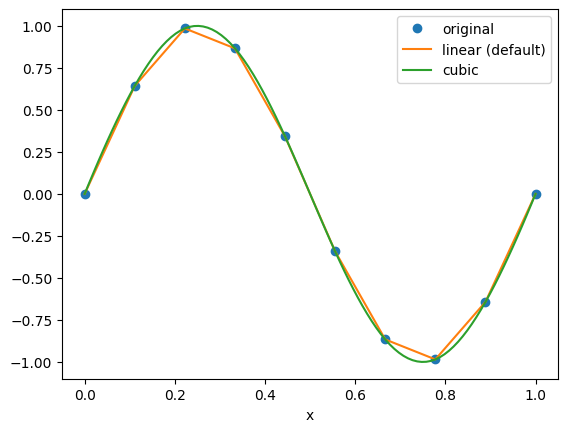

In [225]:
da.plot.line("o", label="original")
da.interp(x=np.linspace(0, 1, 100)).plot.line(label="linear (default)")
da.interp(x=np.linspace(0, 1, 100), method="cubic").plot.line(label="cubic")

plt.legend()

### Interpolation example with real data

Text(0.5, 1.0, 'Interpolated Data')

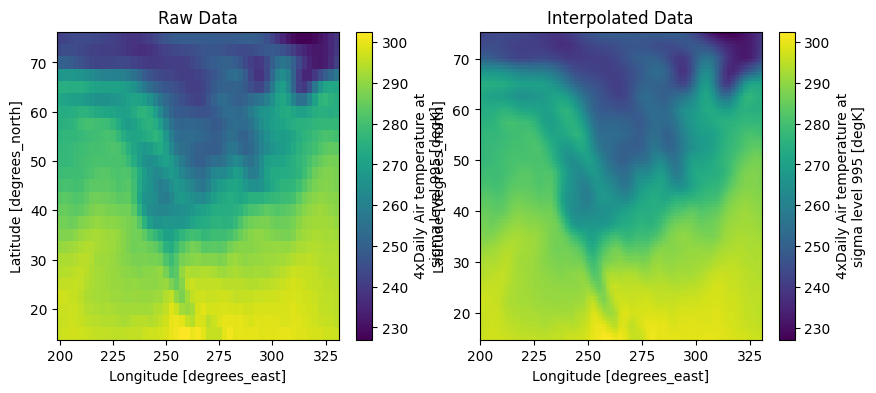

In [226]:
ds = xr.tutorial.open_dataset("air_temperature").isel(time=0)
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

ds.air.plot(ax=axes[0]) # raw data
axes[0].set_title("Raw Data")

# Adding new points to interpolate
new_lon = np.linspace(ds.lon[0], ds.lon[-1], ds.dims["lon"] * 4)
new_lat = np.linspace(ds.lat[0], ds.lat[-1], ds.dims["lat"] * 4)

ds_interp = ds.interp(lat=new_lat, lon=new_lon)
ds_interp.air.plot(ax=axes[1])
axes[1].set_title("Interpolated Data")

--- 
# Computation

Works like NumPy or Pandas. A cool method for working with NaNs, is `interpolate_na()` (in pandas, `interpolate()`)

In [227]:
x = xr.DataArray(
    [0, 1, np.nan, np.nan, 2],
    dims = "x",
    coords={"xx": xr.Variable("x", [0, 1, 1.1, 1.9, 3])}
)

x.interpolate_na(dim="x", method="linear", use_coordinate="xx")

<xarray.DataArray (x: 5)>
array([0.  , 1.  , 1.05, 1.45, 2.  ])
Coordinates:
    xx       (x) float64 0.0 1.0 1.1 1.9 3.0
Dimensions without coordinates: x

If `use_coordinate` is used, the interpolation is calculated based on the values of the coordinates provided, not on the values of the `DataArray` (main difference with pandas).

All the **aggregation** methods have been updated to take a `dim` argument instead of `axis`. This leads to a much more intuitive syntax, for example:

In [228]:
arr.mean(dim="time")

<xarray.DataArray 'foo' (space: 3)>
array([-0.1962986 , -0.21735826,  0.25154638])
Coordinates:
  * space    (space) <U2 'IA' 'IL' 'IN'

In [229]:
arr.std(["time", "space"])

<xarray.DataArray 'foo' ()>
array(0.80112195)

In [230]:
arr.min()

<xarray.DataArray 'foo' ()>
array(-2.20643831)

## Coarsen Large Arrays

Suppose we have the following `DataArray`

In [231]:
x = np.linspace(0, 10, 300)
t = pd.date_range("2023-04-17", periods=364)

da = xr.DataArray(
    np.sin(x) * np.cos(np.linspace(0, 1, 364))[:, np.newaxis],
    dims=["time", "x"],
    coords={"time": t, "x": x},
)

da

<xarray.DataArray (time: 364, x: 300)>
array([[ 0.        ,  0.03343858,  0.06683976, ..., -0.48672119,
        -0.51565952, -0.54402111],
       [ 0.        ,  0.03343845,  0.06683951, ..., -0.48671934,
        -0.51565756, -0.54401905],
       [ 0.        ,  0.03343807,  0.06683875, ..., -0.4867138 ,
        -0.51565169, -0.54401285],
       ...,
       [ 0.        ,  0.0182217 ,  0.03642301, ..., -0.26522911,
        -0.28099849, -0.29645358],
       [ 0.        ,  0.01814439,  0.03626848, ..., -0.26410385,
        -0.27980632, -0.29519584],
       [ 0.        ,  0.01806694,  0.03611368, ..., -0.26297658,
        -0.27861203, -0.29393586]])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-17 2023-04-18 ... 2024-04-14
  * x        (x) float64 0.0 0.03344 0.06689 0.1003 ... 9.9 9.933 9.967 10.0

and suppose we want to compute the mean in blocks of 7 days along  `time` dimension and every 2 points along `x` dimension, we can do this with

In [232]:
da.coarsen(time=7, x=2).mean()

<xarray.DataArray (time: 52, x: 150)>
array([[ 0.01671847,  0.08349886,  0.14990579, ..., -0.41198807,
        -0.47195655, -0.52981418],
       [ 0.01671269,  0.08347003,  0.14985403, ..., -0.41184582,
        -0.47179359, -0.52963124],
       [ 0.01670071,  0.08341016,  0.14974655, ..., -0.41155042,
        -0.47145519, -0.52925136],
       ...,
       [ 0.00968205,  0.04835611,  0.0868139 , ..., -0.23859177,
        -0.2733209 , -0.30682759],
       [ 0.00941742,  0.04703446,  0.08444113, ..., -0.23207067,
        -0.26585059, -0.29844148],
       [ 0.00914929,  0.04569531,  0.08203696, ..., -0.22546326,
        -0.25828142, -0.2899444 ]])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-20 2023-04-27 ... 2024-04-11
  * x        (x) float64 0.01672 0.08361 0.1505 0.2174 ... 9.849 9.916 9.983

Note: `coarsen` blocks should be multiple of the data lenght. You can choose `boundary="trim"` or `boundary="pad"` for trimming excess entries or padding `nan` to insufficient entries.

## Broadcasting by Dimension Name

`DataArray` objects automatically align themselves ("broadcasting" in NumPy) by dimension name instead of axis order.

In [233]:
a = xr.DataArray([1, 2], [("x", ["a", "b"])])
a

<xarray.DataArray (x: 2)>
array([1, 2])
Coordinates:
  * x        (x) <U1 'a' 'b'

In [234]:
b = xr.DataArray([-1, -2, -3], [("y", [10, 20, 30])])
b

<xarray.DataArray (y: 3)>
array([-1, -2, -3])
Coordinates:
  * y        (y) int64 10 20 30

We can apply mathematical operations to these arrays, and their dimensions are expanded automatically

In [235]:
a * b

<xarray.DataArray (x: 2, y: 3)>
array([[-1, -2, -3],
       [-2, -4, -6]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int64 10 20 30

Dimensions are always reordered in the **order in which they first appeared**

In [236]:
c = xr.DataArray(np.arange(6).reshape(3, 2), [b["y"], a["x"]])
c

<xarray.DataArray (y: 3, x: 2)>
array([[0, 1],
       [2, 3],
       [4, 5]])
Coordinates:
  * y        (y) int64 10 20 30
  * x        (x) <U1 'a' 'b'

In [237]:
a + c

<xarray.DataArray (x: 2, y: 3)>
array([[1, 3, 5],
       [3, 5, 7]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int64 10 20 30

It the same as

In [238]:
a.values[:, np.newaxis] + c.values.T

array([[1, 3, 5],
       [3, 5, 7]])

In [239]:
a2, b2 = xr.broadcast(a, b) # explicit broadcast
print(a2) # braodcasted along y dimension
print("---------------------------")
print(b2) # broadcasted along x dimension

<xarray.DataArray (x: 2, y: 3)>
array([[1, 1, 1],
       [2, 2, 2]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int64 10 20 30
---------------------------
<xarray.DataArray (x: 2, y: 3)>
array([[-1, -2, -3],
       [-1, -2, -3]])
Coordinates:
  * y        (y) int64 10 20 30
  * x        (x) <U1 'a' 'b'


### Automatic alignement

Alignement is automatic for arithmetic on binary operations. The default result of a binary operation is the **Intersection** of coordinate labels.

In [240]:
arr = xr.DataArray(np.arange(3), [("x", range(3))])
arr + arr[:-1]

<xarray.DataArray (x: 2)>
array([0, 2])
Coordinates:
  * x        (x) int64 0 1

If coordinate values for a dimension are missing on either argument, all matching dimensions must have the same size. If not, a `ValueError` is raised as below

In [241]:
arr + xr.DataArray([1, 2], dims=["x"])

ValueError: cannot reindex or align along dimension 'x' because of conflicting dimension sizes: {2, 3} (note: an index is found along that dimension with size=3)

Before loops or performance crical code, it's a good practice to explicitly align arrays (e.g. using `align()`) to avoid the overhead of repeated alignement with each operation.

Note: although index coordinates are aligned, other coordinates area not, and if their values conflicts, they will be **dropped**.

### `apply_ufunc()`

Xarray's mathematical computation can be quite slow sometimes, because the overhead of all the consistency checks can be non negligeble.

For this reason, Xarray expose `apply_ufunc()` for writing **custom** function that will be applied to the raw NumPy array, and more, `apply_ufunc()` takes care of everything needed fo an idiomatic xarray wrapper, including alignement, broadcasting, looping over `Dataset` variables, and merging of coordinates.

In [ ]:
squared_error = lambda x, y: (x - y) ** 2

arr1 = xr.DataArray([0, 1, 2, 3], dims="x")

xr.apply_ufunc(squared_error, arr1, 1)

<xarray.DataArray (x: 4)>
array([1, 0, 1, 4])
Dimensions without coordinates: x

More complex functions can be performed following NumPy's [generalized ufunc](https://numpy.org/doc/stable/reference/c-api/generalized-ufuncs.html) "**core**" dimensions, in short, the dimension that is the base of the structure of the array, where broadcasting should not be performed (e.g. the dimensions along wich `sum()` is computed). A good clue that core dimensions are needed is the presence of an `axis` argument on the corresponding NumPy function.

With `apply_ufunc`, core dimensions are recognized by name, and then moved to the last dimension of any input arguments before applying the given function.

As example, here is how we would wrap `numpy.linalg.norm()` to calcoluate the vector norm:

In [ ]:
def vector_norm(x, dim, ord=None):
    return xr.apply_ufunc(
        np.linalg.norm, x, input_core_dims=[[dim]], kwargs={"ord": ord, "axis": -1}
    )

In [ ]:
vector_norm(arr1, "x", ord=2)

<xarray.DataArray ()>
array(3.74165739)

# GroupBy

Even in this case, the API is similar to pandas for applying the **split-apply-combine** strategy:
1. Split data into multiple independent groups.
2. Apply some function to each group.
3. Combine the groups back into a single data object.

In [246]:
ds = xr.Dataset(
    {"foo": (("x", "y"), np.random.rand(4, 3))},
    coords={"x": [10, 20, 30, 40], "letters": ("x", list("abba"))},
)

ds

<xarray.Dataset>
Dimensions:  (x: 4, y: 3)
Coordinates:
  * x        (x) int64 10 20 30 40
    letters  (x) <U1 'a' 'b' 'b' 'a'
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 0.9904 0.9268 0.5292 0.8194 ... 0.4669 0.2886 0.2739

In [247]:
arr = ds["foo"]

In [248]:
ds.groupby("letters").groups # groups of the indices

{'a': [0, 3], 'b': [1, 2]}

In [249]:
list(ds.groupby("letters"))

[('a',
  <xarray.Dataset>
  Dimensions:  (x: 2, y: 3)
  Coordinates:
    * x        (x) int64 10 40
      letters  (x) <U1 'a' 'a'
  Dimensions without coordinates: y
  Data variables:
      foo      (x, y) float64 0.9904 0.9268 0.5292 0.4669 0.2886 0.2739),
 ('b',
  <xarray.Dataset>
  Dimensions:  (x: 2, y: 3)
  Coordinates:
    * x        (x) int64 20 30
      letters  (x) <U1 'b' 'b'
  Dimensions without coordinates: y
  Data variables:
      foo      (x, y) float64 0.8194 0.5408 0.8322 0.5834 0.136 0.1286)]

## Binning

We can bin data into coarser groups. The binning implementation is done via `pandas.cut()` function.

In [ ]:
x_bins = [0, 25, 50]
ds.groupby_bins("x", x_bins).groups # indices of the grouped elements

{Interval(0, 25, closed='right'): [0, 1],
 Interval(25, 50, closed='right'): [2, 3]}

## Apply

We can apply every pandas aggregation function (mean, sum, std, ...), or we can use `map()` providing our own functions

In [250]:
def standardize(x):
    return (x - x.mean()) / x.std()

In [254]:
arr.groupby("letters").map(standardize)

<xarray.DataArray 'foo' (x: 4, y: 3)>
array([[ 1.44948248,  1.2251147 , -0.17655065],
       [ 1.09283786,  0.1191326 ,  1.13758089],
       [ 0.26783559, -1.2958587 , -1.32152824],
       [-0.39639802, -1.02503872, -1.07660978]])
Coordinates:
  * x        (x) int64 10 20 30 40
    letters  (x) <U1 'a' 'b' 'b' 'a'
Dimensions without coordinates: y

The great thing about Xarray, is that we can compute means specifying dimensions names

In [260]:
arr.groupby("letters").mean(dim="x")

<xarray.DataArray 'foo' (letters: 2, y: 3)>
array([[0.72862687, 0.60766217, 0.40157945],
       [0.70141489, 0.33840369, 0.48043485]])
Coordinates:
  * letters  (letters) object 'a' 'b'
Dimensions without coordinates: y

Using the elipsis operator (`(...)`), we aggregate over all dimensions other than the provided one

In [263]:
arr.groupby("x").std(...)

<xarray.DataArray 'foo' (x: 4)>
array([0.20406097, 0.13445473, 0.21266697, 0.08769983])
Coordinates:
  * x        (x) int64 10 20 30 40
    letters  (x) <U1 'a' 'b' 'b' 'a'

## Multidimensional Grouping

In [265]:
da = xr.DataArray(
    [[0, 1], [2,3]],
    coords={
        "lon": (["ny", "nx"], [[30, 40], [40, 50]]),
        "lat": (["ny", "nx"], [[10, 10], [20, 20]]),
    },
    dims=["ny", "nx"],
)

da

<xarray.DataArray (ny: 2, nx: 2)>
array([[0, 1],
       [2, 3]])
Coordinates:
    lon      (ny, nx) int64 30 40 40 50
    lat      (ny, nx) int64 10 10 20 20
Dimensions without coordinates: ny, nx

In [270]:
da.groupby("lon").sum(...)

<xarray.DataArray (lon: 3)>
array([0, 3, 3])
Coordinates:
  * lon      (lon) int64 30 40 50

In [273]:
da.groupby("lon").map(lambda x: x - x.mean(), shortcut=False)

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


<xarray.DataArray (ny: 2, nx: 2)>
array([[ 0. , -0.5],
       [ 0.5,  0. ]])
Coordinates:
    lon      (ny, nx) int64 30 40 40 50
    lat      (ny, nx) int64 10 10 20 20
Dimensions without coordinates: ny, nx

Multidimesional indexing can cause the creation of a very large number of bins, and a coarser binning can be more desirable:

In [275]:
da.groupby_bins("lon", [0, 45, 50]).sum()

<xarray.DataArray (lon_bins: 2)>
array([3, 3])
Coordinates:
  * lon_bins  (lon_bins) object (0, 45] (45, 50]

---
# Reshaping and Reorganizing data
We can change the structure or organization of data by modifying dimensions, array shapes, order of values or indexes.

## Reordering, Expanding and Squeezing Dimensions

In [287]:
ds = xr.Dataset(
    {
        "foo": (("x", "y", "z"), [[[42]]]),
        "bar": (("y", "z"), [[24]])
    }
)
ds

<xarray.Dataset>
Dimensions:  (x: 1, y: 1, z: 1)
Dimensions without coordinates: x, y, z
Data variables:
    foo      (x, y, z) int64 42
    bar      (y, z) int64 24

We can simply reorder dimension using the `transpose()` method (the elipsis can be used to specify all other dimensions). Note that on a `DataArray` using the `transpose()` method reorders dimensions, but in a `Dataset` we reorder **dimensions across variables**.

In [288]:
ds.transpose("y", "z", "x")

<xarray.Dataset>
Dimensions:  (x: 1, y: 1, z: 1)
Dimensions without coordinates: x, y, z
Data variables:
    foo      (y, z, x) int64 42
    bar      (y, z) int64 24

In [289]:
# equivalent
ds.transpose(..., "x")

<xarray.Dataset>
Dimensions:  (x: 1, y: 1, z: 1)
Dimensions without coordinates: x, y, z
Data variables:
    foo      (y, z, x) int64 42
    bar      (y, z) int64 24

In [290]:
# Full reverse of all dimensions
ds.transpose()

<xarray.Dataset>
Dimensions:  (x: 1, y: 1, z: 1)
Dimensions without coordinates: x, y, z
Data variables:
    foo      (z, y, x) int64 42
    bar      (z, y) int64 24

For expanding a dimension along a new one, use `expand_dims()`, in a dataframe this dimension will be attached to all data variables.

In [291]:
expanded = ds.expand_dims("s")
expanded

<xarray.Dataset>
Dimensions:  (s: 1, x: 1, y: 1, z: 1)
Dimensions without coordinates: s, x, y, z
Data variables:
    foo      (s, x, y, z) int64 42
    bar      (s, y, z) int64 24

In [292]:
# Removing that dimension
expanded.squeeze("s")

<xarray.Dataset>
Dimensions:  (x: 1, y: 1, z: 1)
Dimensions without coordinates: x, y, z
Data variables:
    foo      (x, y, z) int64 42
    bar      (y, z) int64 24

### Converting between `Dataset` and `DataArray`

In [294]:
arr = ds.to_array()
arr

<xarray.DataArray (variable: 2, x: 1, y: 1, z: 1)>
array([[[[42]]],


       [[[24]]]])
Coordinates:
  * variable  (variable) object 'foo' 'bar'
Dimensions without coordinates: x, y, z

This method *broadcasts* all data variables in the dataset against each other, then *concatenates* them along a **new** dimension into a new array while preserving coordinates.

This means that the resulting array includes the *union* of data variable dimensions.

In [296]:
ds2 = xr.Dataset({"a": 0, "b": ("x", [3, 4, 5])})
ds2

<xarray.Dataset>
Dimensions:  (x: 3)
Dimensions without coordinates: x
Data variables:
    a        int64 0
    b        (x) int64 3 4 5

In [298]:
ds2.to_array() # the resulting array has 6 elements!

<xarray.DataArray (variable: 2, x: 3)>
array([[0, 0, 0],
       [3, 4, 5]])
Coordinates:
  * variable  (variable) object 'a' 'b'
Dimensions without coordinates: x

The opposite operation can be done with `to_dataset()`; if no `dim` are provided, the `Dataset` has only one variable.

In [300]:
arr.to_dataset(name="foo")

<xarray.Dataset>
Dimensions:   (variable: 2, x: 1, y: 1, z: 1)
Coordinates:
  * variable  (variable) object 'foo' 'bar'
Dimensions without coordinates: x, y, z
Data variables:
    foo       (variable, x, y, z) int64 42 24

## Stacking and unstacking Dimensions
Like `pandas.MultiIndex`, but in Xarray they combine or split dimensions

In [304]:
array = xr.DataArray(
    np.random.randn(2, 3), coords=[("x", ["a", "b"]), ("y", [0, 1, 2])]
)

array

<xarray.DataArray (x: 2, y: 3)>
array([[-2.20756557, -0.37122801, -0.45254152],
       [ 1.11471753, -0.64277095, -1.14874929]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int64 0 1 2

In [312]:
stacked = array.stack(z=("x", "y"))
stacked

<xarray.DataArray (z: 6)>
array([-2.20756557, -0.37122801, -0.45254152,  1.11471753, -0.64277095,
       -1.14874929])
Coordinates:
  * z        (z) object MultiIndex
  * x        (z) <U1 'a' 'a' 'a' 'b' 'b' 'b'
  * y        (z) int64 0 1 2 0 1 2

In [315]:
stacked.unstack("z")

<xarray.DataArray (x: 2, y: 3)>
array([[-2.20756557, -0.37122801, -0.45254152],
       [ 1.11471753, -0.64277095, -1.14874929]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int64 0 1 2

It can be handy to see how it's represented in a MultiIndexed `pandas.DataFrame`

In [316]:
stacked.to_dataframe(name="values")

x  y    values
x y                
a 0  a  0 -2.207566
  1  a  1 -0.371228
  2  a  2 -0.452542
b 0  b  0  1.114718
  1  b  1 -0.642771
  2  b  2 -1.148749

`unstack()` always succeed, and missing levels are filled with `NaN` in the resulting object.

In [322]:
stacked2 = stacked[::2]
stacked2

<xarray.DataArray (z: 3)>
array([-2.20756557, -0.45254152, -0.64277095])
Coordinates:
  * z        (z) object MultiIndex
  * x        (z) <U1 'a' 'a' 'b'
  * y        (z) int64 0 2 1

In [325]:
stacked2.unstack("z")

<xarray.DataArray (x: 2, y: 3)>
array([[-2.20756557,         nan, -0.45254152],
       [        nan, -0.64277095,         nan]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int64 0 1 2

### Stacking different Variables together

In the examples below, we will use the method `Dataset.to_stacked_array()`, that differes from a basic `to_array()` for broadcasting dimensions.
The first method, allows combining variables of differing dimensions, without the wasteful copy of braodcasting missing dimensions along the lower dimensional variable. The operation can be reveresed with `DataArray.to_unstacked_dataset()`

In [327]:
data = xr.Dataset(
    data_vars={
        "a": (("x", "y"), [[0, 1, 2], [3, 4, 5]]),
        "b": ("x", [6, 7]),
    },
    coords={"y": ["u", "v", "w"]},
)

data

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * y        (y) <U1 'u' 'v' 'w'
Dimensions without coordinates: x
Data variables:
    a        (x, y) int64 0 1 2 3 4 5
    b        (x) int64 6 7

We can easily spot the differences between the two methods discussed above with the following examples

In [328]:
data.to_array()

<xarray.DataArray (variable: 2, x: 2, y: 3)>
array([[[0, 1, 2],
        [3, 4, 5]],

       [[6, 6, 6],
        [7, 7, 7]]])
Coordinates:
  * y         (y) <U1 'u' 'v' 'w'
  * variable  (variable) object 'a' 'b'
Dimensions without coordinates: x

In [340]:
stacked = data.to_stacked_array("z", sample_dims=["x"])
stacked

<xarray.DataArray 'a' (x: 2, z: 4)>
array([[0, 1, 2, 6],
       [3, 4, 5, 7]])
Coordinates:
  * z         (z) object MultiIndex
  * variable  (z) object 'a' 'a' 'a' 'b'
  * y         (z) object 'u' 'v' 'w' nan
Dimensions without coordinates: x

In [339]:
stacked.to_unstacked_dataset("z")

<xarray.Dataset>
Dimensions:  (y: 3, x: 2)
Coordinates:
  * y        (y) object 'u' 'v' 'w'
Dimensions without coordinates: x
Data variables:
    a        (x, y) int64 0 1 2 3 4 5
    b        (x) int64 6 7

## Set and Reset Index

In [341]:
da = xr.DataArray(
    np.random.rand(4),
    coords={
    "band": ("x", ["a", "a", "b", "b"]),
    "wavenumber": ("x", np.linspace(200, 400, 4)),
    },
    dims="x",
)

da

<xarray.DataArray (x: 4)>
array([0.87788984, 0.73177035, 0.68733323, 0.14011141])
Coordinates:
    band        (x) <U1 'a' 'a' 'b' 'b'
    wavenumber  (x) float64 200.0 266.7 333.3 400.0
Dimensions without coordinates: x

In [353]:
mda = da.set_index(x=["band", "wavenumber"])
mda

<xarray.DataArray (x: 4)>
array([0.87788984, 0.73177035, 0.68733323, 0.14011141])
Coordinates:
  * x           (x) object MultiIndex
  * band        (x) <U1 'a' 'a' 'b' 'b'
  * wavenumber  (x) float64 200.0 266.7 333.3 400.0

Setting those as indexes, they now can be used for indexing

In [354]:
mda.sel(band="a")

<xarray.DataArray (wavenumber: 2)>
array([0.87788984, 0.73177035])
Coordinates:
  * wavenumber  (wavenumber) float64 200.0 266.7
    band        <U1 'a'

In [356]:
mda.reset_index("x") # extracting multi index levels as coordinates

<xarray.DataArray (x: 4)>
array([0.87788984, 0.73177035, 0.68733323, 0.14011141])
Coordinates:
    band        (x) <U1 'a' 'a' 'b' 'b'
    wavenumber  (x) float64 200.0 266.7 333.3 400.0
Dimensions without coordinates: x

In [360]:
mda.reorder_levels(x=["wavenumber", "band"])

<xarray.DataArray (x: 4)>
array([0.87788984, 0.73177035, 0.68733323, 0.14011141])
Coordinates:
  * x           (x) object MultiIndex
  * wavenumber  (x) float64 200.0 266.7 333.3 400.0
  * band        (x) <U1 'a' 'a' 'b' 'b'

# Combining Data

Each need is mapped to the corresponding function:
- Combining `Dataset`s or `DataArray`s along a single dimension &rarr; [concatenate](#concatenate)
- Combining `Dataset`s with different `Variable`s &rarr; [merge](#merging)
- Combining `Dataset`s or `DataArray`s with different indexes or missing values &rarr; [combine](#combine)
- Combining `Dataset`s or `DataArray`s along a single dimension &rarr; [combining.multi](#combining-along-multiple-dimensions)

## Concatenate

Concatenate along provided dimension

In [362]:
da = xr.DataArray(
    np.arange(6).reshape(2, 3), [("x", ["a", "b"]), ("y", [10, 20, 30])]
)

da

<xarray.DataArray (x: 2, y: 3)>
array([[0, 1, 2],
       [3, 4, 5]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int64 10 20 30

In [364]:
da.isel(y=slice(0, 1))

<xarray.DataArray (x: 2, y: 1)>
array([[0],
       [3]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int64 10

In [369]:
da[:, 1:]

<xarray.DataArray (x: 2, y: 2)>
array([[1, 2],
       [4, 5]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int64 20 30

In [366]:
xr.concat([da[:, :1], da[:, 1:]], dim="y")

<xarray.DataArray (x: 2, y: 3)>
array([[0, 1, 2],
       [3, 4, 5]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int64 10 20 30

In [372]:
# more pandas friendly
xr.concat([da.isel(y=slice(0,1)), da.isel(y=slice(1, None))], dim="y")

<xarray.DataArray (x: 2, y: 3)>
array([[0, 1, 2],
       [3, 4, 5]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int64 10 20 30

In [375]:
# concatenating along a new dimension
xr.concat([da.isel(x=0), da.isel(x=1)], "x")

<xarray.DataArray (x: 2, y: 3)>
array([[0, 1, 2],
       [3, 4, 5]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int64 10 20 30

In [376]:
# we can provide a different name for the new dimension
xr.concat([da.isel(x=0), da.isel(x=1)], "new_Dim")

<xarray.DataArray (new_Dim: 2, y: 3)>
array([[0, 1, 2],
       [3, 4, 5]])
Coordinates:
    x        (new_Dim) <U1 'a' 'b'
  * y        (y) int64 10 20 30
Dimensions without coordinates: new_Dim

## Merging

In [388]:
ds = da.to_dataset(name="foo")
ds

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int64 10 20 30
Data variables:
    foo      (x, y) int64 0 1 2 3 4 5

In [382]:
xr.merge([ds, ds.rename({"foo": "bar"})])

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int64 10 20 30
Data variables:
    foo      (x, y) int64 0 1 2 3 4 5
    bar      (x, y) int64 0 1 2 3 4 5

In [384]:
xr.merge([xr.DataArray(n, name=f'var{n}') for n in range(5)])

<xarray.Dataset>
Dimensions:  ()
Data variables:
    var0     int64 0
    var1     int64 1
    var2     int64 2
    var3     int64 3
    var4     int64 4

By default the resulting `Dataset` of a merge operation will be aligned on the **union** of all index coordinates

In [387]:
ds2 = xr.Dataset({"bar": ("x", [1, 2, 3, 4]), "x": list("abcd")})

xr.merge([ds, ds2])

<xarray.Dataset>
Dimensions:  (x: 4, y: 3)
Coordinates:
  * x        (x) <U1 'a' 'b' 'c' 'd'
  * y        (y) int64 10 20 30
Data variables:
    foo      (x, y) float64 0.0 1.0 2.0 3.0 4.0 5.0 nan nan nan nan nan nan
    bar      (x) int64 1 2 3 4

## Combine

Using `combine_first()`, combines two datasets/dataarray and defaults to non-null values in the calling object.
- The resulting coordinates are the **union** of coordinate labels.
- Vacant cells as a result of the outer join are filled with `NaN`

In [391]:
ar1 = xr.DataArray([[0, 0], [0, 0]], [("x", ["a", "b"]), ("y", [-1, 0])])
ar2 = xr.DataArray([[1, 1], [1, 1]], [("x", ["b", "c"]), ("y", [0, 1])])

ar1.combine_first(ar2)

<xarray.DataArray (x: 3, y: 3)>
array([[ 0.,  0., nan],
       [ 0.,  0.,  1.],
       [nan,  1.,  1.]])
Coordinates:
  * x        (x) <U1 'a' 'b' 'c'
  * y        (y) int64 -1 0 1

In [392]:
ar2.combine_first(ar1)

<xarray.DataArray (x: 3, y: 3)>
array([[ 0.,  0., nan],
       [ 0.,  1.,  1.],
       [nan,  1.,  1.]])
Coordinates:
  * x        (x) <U1 'a' 'b' 'c'
  * y        (y) int64 -1 0 1

## Combining along Multiple Dimensions

- `combine_nested()`: requires speciying the order in which the object should be combined
- `combine_by_coords()`: attempts to infer this ordering automatically from the coordinates in the data.

In [393]:
arr = xr.DataArray(
    name="temperature", data=np.random.randint(5, size=(2, 2)),
    dims=["x", "y"],
)
arr

<xarray.DataArray 'temperature' (x: 2, y: 2)>
array([[3, 3],
       [3, 2]])
Dimensions without coordinates: x, y

The dataset for `combine_nested()` must be provided in the form of a nested list, which specifies their relative position or ordering.

In [397]:
ds_grid = [[arr, arr], [arr, arr]] # we specify the ordering and relationship between the dimensions

xr.combine_nested(ds_grid, concat_dim=["x", "y"])

<xarray.DataArray 'temperature' (x: 4, y: 4)>
array([[3, 3, 3, 3],
       [3, 2, 3, 2],
       [3, 3, 3, 3],
       [3, 2, 3, 2]])
Dimensions without coordinates: x, y

We can merge dataset with different variables, wich are divided along a dimension. We can then pass `None` to `concat_dim` to specify the dimension of the nested list over which we wish to use `merge` instead of `concat`

In [401]:
temp = xr.DataArray(name="temperature", data=np.random.randn(2), dims=["t"])
precip = xr.DataArray(name="precipitation", data=np.random.randn(2), dims=["t"])

ds_grid = [[temp, precip], [temp, precip]]
xr.combine_nested(ds_grid, concat_dim=["t", None])

<xarray.Dataset>
Dimensions:        (t: 4)
Dimensions without coordinates: t
Data variables:
    temperature    (t) float64 0.1975 -1.159 0.1975 -1.159
    precipitation  (t) float64 -0.4071 -0.03033 -0.4071 -0.03033

We can combine two datasets using thei common dimension coordinates. They are concatenated in order based on the values in their dimension coorindate, not on their position in the list passed.

In [402]:
x1 = xr.DataArray(name="foo", data=np.random.randn(3), coords=[("x", [0, 1, 2])])
x2 = xr.DataArray(name="bar", data=np.random.randn(3), coords=[("x", [3, 4, 5])])

xr.combine_by_coords([x2, x1])

<xarray.Dataset>
Dimensions:  (x: 6)
Coordinates:
  * x        (x) int64 0 1 2 3 4 5
Data variables:
    bar      (x) float64 nan nan nan 0.2804 0.761 -1.393
    foo      (x) float64 0.1198 -0.8533 -1.226 nan nan nan